In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('1000_Companies.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [6]:
df['State'].value_counts()

State
California    344
New York      334
Florida       322
Name: count, dtype: int64

In [13]:
df_encoded=pd.get_dummies(df,columns=['State']).astype(int)
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349,136897,471784,192261,0,0,1
1,162597,151377,443898,191792,1,0,0
2,153441,101145,407934,191050,0,1,0
3,144372,118671,383199,182901,0,0,1
4,142107,91391,366168,166187,0,1,0


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   R&D Spend         1000 non-null   int64
 1   Administration    1000 non-null   int64
 2   Marketing Spend   1000 non-null   int64
 3   Profit            1000 non-null   int64
 4   State_California  1000 non-null   int64
 5   State_Florida     1000 non-null   int64
 6   State_New York    1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>,
        <Axes: title={'center': 'Marketing Spend'}>],
       [<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'State_California'}>,
        <Axes: title={'center': 'State_Florida'}>],
       [<Axes: title={'center': 'State_New York'}>, <Axes: >, <Axes: >]],
      dtype=object)

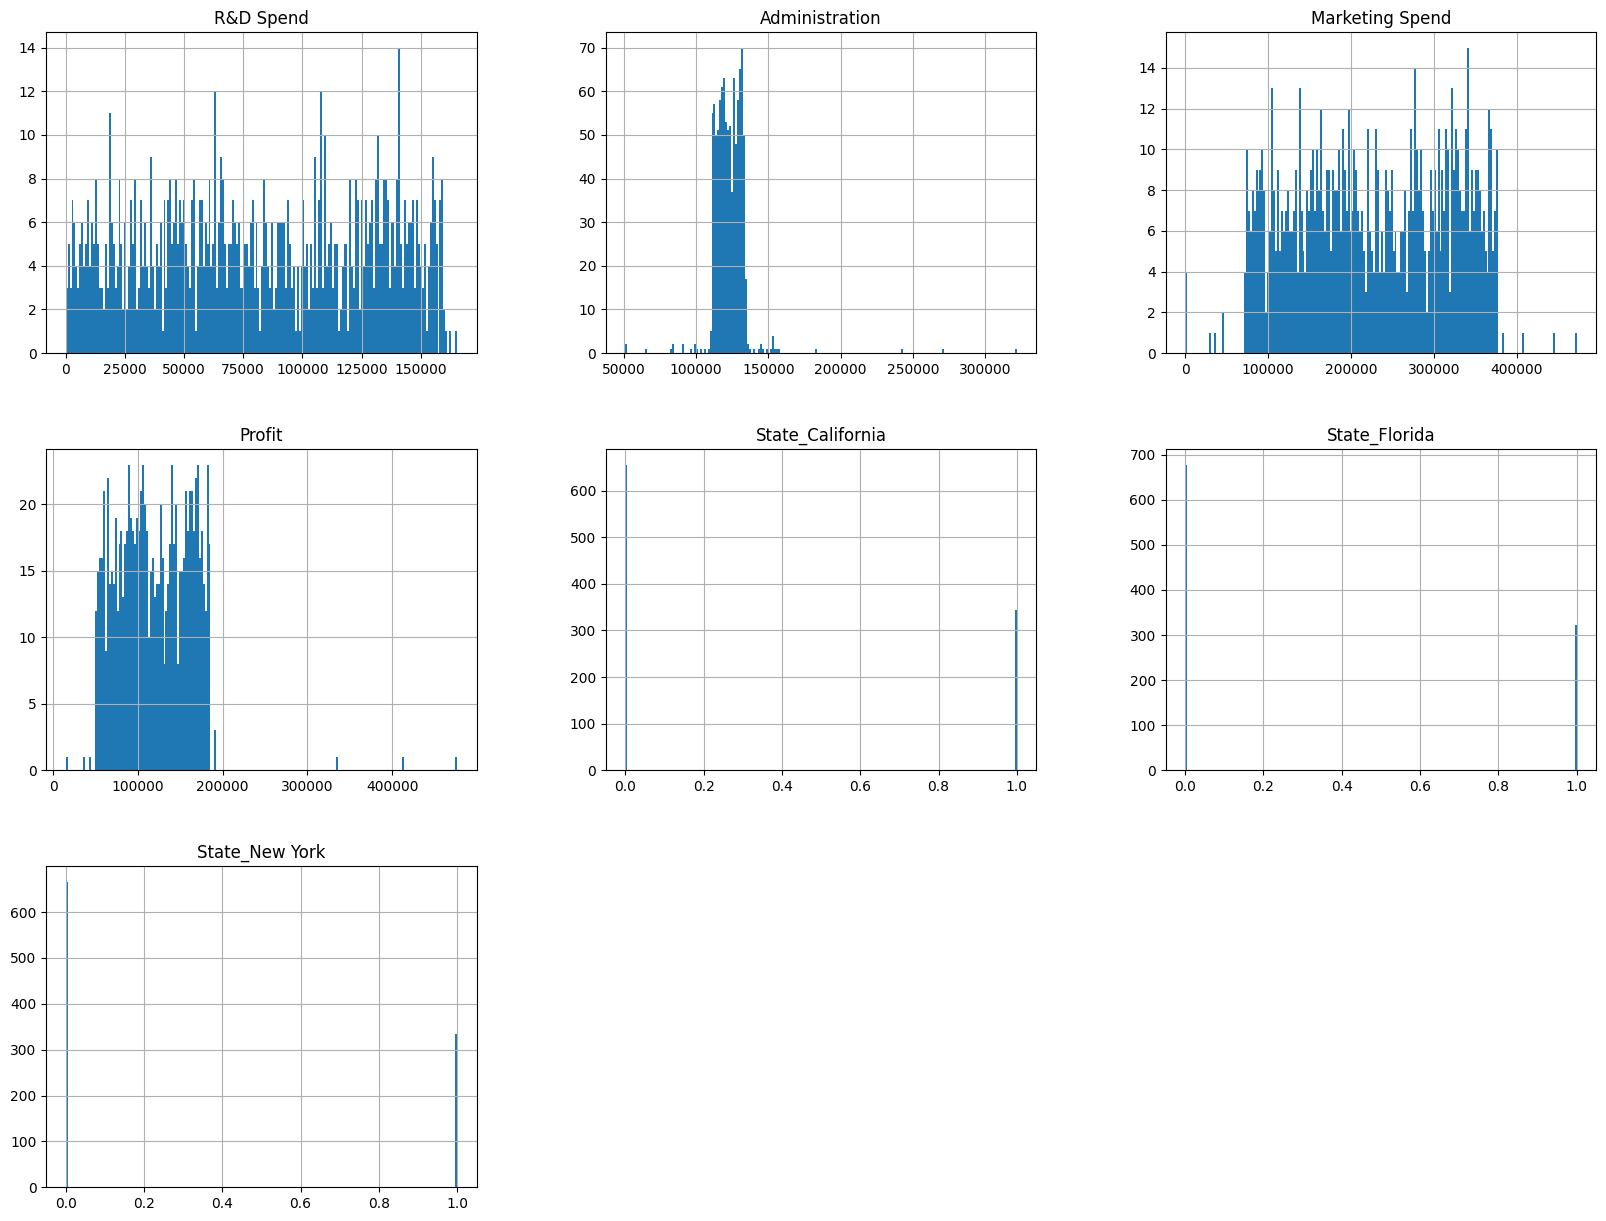

In [17]:
df_encoded.hist(bins=200,figsize=(20,15))

📊 1. R&D Spend

    The values are spread fairly evenly across the range (roughly from 0 to 190,000).

    No clear skew, possibly a uniform or slightly normal distribution.

    Suggests varied investment across different entries.

📊 2. Administration

    Very narrow distribution centered around ~130,000.

    Most values are clustered tightly with minimal variation.

    Suggests administrative costs are fairly consistent across the data.

📊 3. Marketing Spend

    Wide distribution with a fairly even spread, though there’s a slight cluster at the lower range.

    Indicates some companies spend a lot on marketing, others spend very little.

📊 4. Profit

    Profit has a right-skewed distribution — most profits are on the lower end, but a few entries have very high profits.

    Possible outliers (e.g., two entries has profit > 400,000).

    We should consider scaling or capping outliers if you're using this in a regression model.

<Axes: >

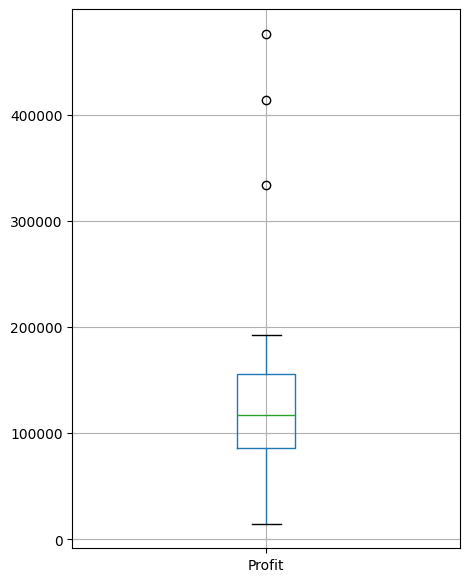

In [18]:
df_encoded.boxplot(column="Profit",figsize=(5,7))

In [31]:
Q1 = df_encoded['Profit'].quantile(0.25)
Q3 = df_encoded['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_encoded[(df_encoded['Profit'] < lower_bound) | (df_encoded['Profit'] > upper_bound)]
print(outliers)

     R&D Spend  Administration  Marketing Spend  Profit  State_California  \
997     100275          241926           227142  413956                 1   
998     128456          321652           281692  333962                 1   
999     161181          270939           295442  476485                 0   

     State_Florida  State_New York  
997              0               0  
998              0               0  
999              0               1  


In [32]:
df_no_outliers=df_encoded[(df_encoded['Profit'] >= lower_bound) & (df_encoded['Profit'] <= upper_bound)]

In [33]:
df_encoded.shape, df_no_outliers.shape

((1000, 7), (997, 7))

In [34]:
Q1_admin = df_no_outliers['Administration'].quantile(0.25)
Q3_admin = df_no_outliers['Administration'].quantile(0.75)
IQR_admin = Q3_admin - Q1_admin

lower_admin = Q1_admin - 1.5 * IQR_admin
upper_admin = Q3_admin + 1.5 * IQR_admin

df_cleaned = df_no_outliers[(df_no_outliers['Administration'] >= lower_admin) & 
                            (df_no_outliers['Administration'] <= upper_admin)]


In [35]:
print("Original:", df_encoded.shape)
print("After Profit Cleaning:", df_no_outliers.shape)
print("After Admin Cleaning:", df_cleaned.shape)

Original: (1000, 7)
After Profit Cleaning: (997, 7)
After Admin Cleaning: (978, 7)


In [36]:
df_cleaned.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349,136897,471784,192261,0,0,1
2,153441,101145,407934,191050,0,1,0
3,144372,118671,383199,182901,0,0,1
5,131876,99814,362861,156991,0,0,1
6,134615,147198,127716,156122,1,0,0


In [37]:
X=df_cleaned.drop('Profit',axis=1)
y=df_cleaned['Profit']
print(X.head())
print(y.head())

   R&D Spend  Administration  Marketing Spend  State_California  \
0     165349          136897           471784                 0   
2     153441          101145           407934                 0   
3     144372          118671           383199                 0   
5     131876           99814           362861                 0   
6     134615          147198           127716                 1   

   State_Florida  State_New York  
0              0               1  
2              1               0  
3              0               1  
5              0               1  
6              0               0  
0    192261
2    191050
3    182901
5    156991
6    156122
Name: Profit, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((733, 6), (245, 6))

<Axes: >

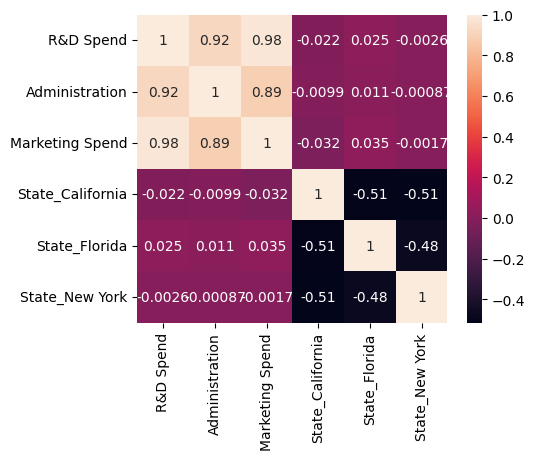

In [48]:
plt.figure(figsize=(5,4))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[-1.63896991e+00, -1.55512935e+00, -1.61713235e+00,
        -7.39197878e-01, -6.86940718e-01,  1.43768759e+00],
       [-5.44633840e-01, -5.17166189e-01, -5.39394735e-01,
         1.35281774e+00, -6.86940718e-01, -6.95561405e-01],
       [-1.08619205e+00, -1.03082311e+00, -1.07274026e+00,
        -7.39197878e-01, -6.86940718e-01,  1.43768759e+00],
       ...,
       [-1.15254089e+00, -5.62252929e-01, -6.04596921e-01,
         1.35281774e+00, -6.86940718e-01, -6.95561405e-01],
       [-1.57231957e+00, -1.49192493e+00, -1.55149050e+00,
        -7.39197878e-01, -6.86940718e-01,  1.43768759e+00],
       [ 6.94480968e-01,  6.39815943e-04,  3.73446864e-01,
        -7.39197878e-01, -6.86940718e-01,  1.43768759e+00]],
      shape=(245, 6))

Text(0.5, 1.0, 'X_train After Scaling')

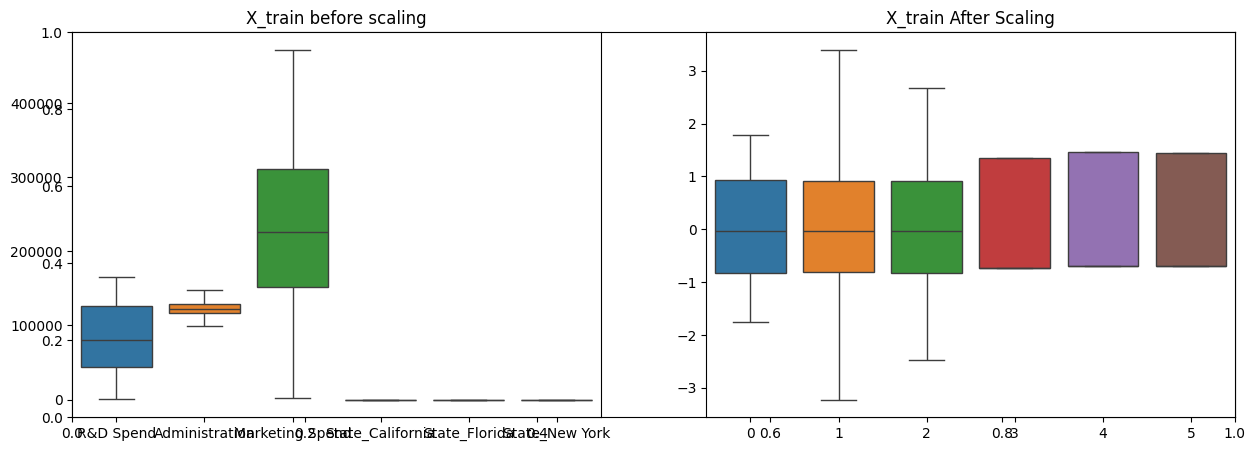

In [50]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Mean absolute error: 388.26718979417024
Score: 0.9958656817144086


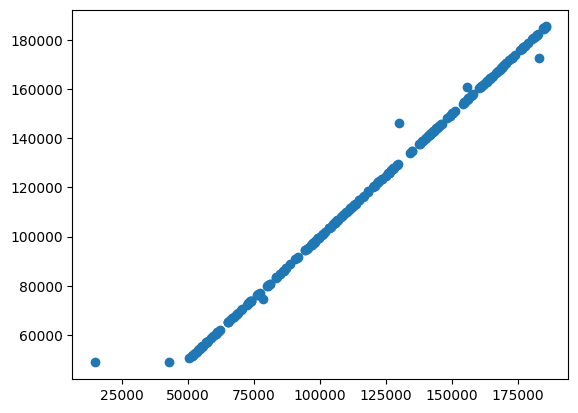

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error:", mae)
print("Score:",score)
plt.scatter(y_test,y_pred)

In [52]:
# On training data
y_train_pred = linreg.predict(X_train_scaled)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("Train R2:", train_r2)
print("Train MAE:", train_mae)

# Already computed for test:
print("Test R2:", score)
print("Test MAE:", mae)


Train R2: 0.998775575228029
Train MAE: 283.54089964988185
Test R2: 0.9958656817144086
Test MAE: 388.26718979417024


Text(0.5, 1.0, 'Residuals vs Predicted')

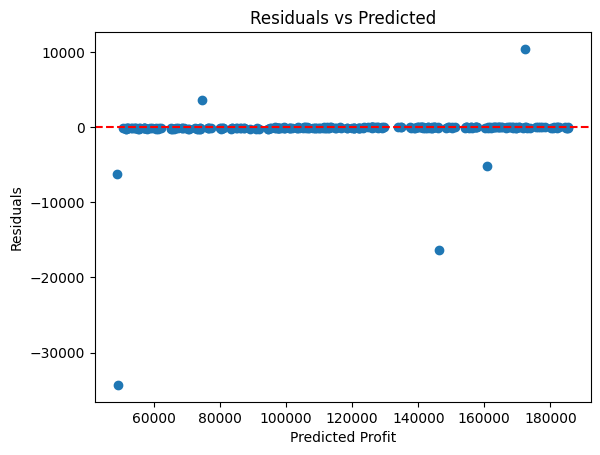

In [53]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

In [54]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

In [67]:
ridge = Ridge()  # You can tune alpha
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression:")
print("MAE:", ridge_mae)
print("R² Score:", ridge_r2)

Ridge Regression:
MAE: 402.5677930451528
R² Score: 0.9958666992384432


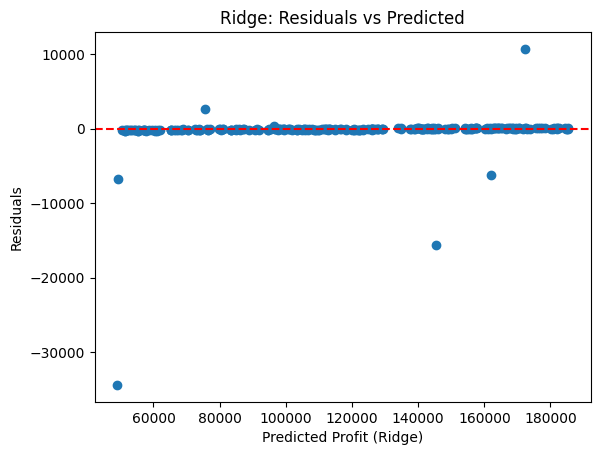

In [56]:
import matplotlib.pyplot as plt

residuals_ridge = y_test - ridge_pred

plt.scatter(ridge_pred, residuals_ridge)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Profit (Ridge)")
plt.ylabel("Residuals")
plt.title("Ridge: Residuals vs Predicted")
plt.show()


In [68]:
lasso = Lasso()  # You can also tune this alpha
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("\nLasso Regression:")
print("MAE:", lasso_mae)
print("R² Score:", lasso_r2)



Lasso Regression:
MAE: 388.0442262801221
R² Score: 0.9958609742900734


Text(0.5, 1.0, 'Lasso: Residuals vs Predicted')

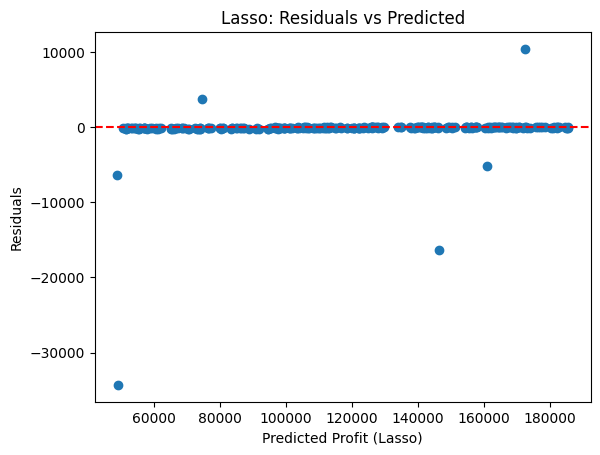

In [73]:
residuals_lasso = y_test - lasso_pred
plt.scatter(lasso_pred, residuals_lasso)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Profit (Lasso)")
plt.ylabel("Residuals")
plt.title("Lasso: Residuals vs Predicted")

In [74]:
print("Lasso:", lasso.coef_) #Lasso found that adjusting the intercept + other features was enough to model California cases, so the coefficient for State_California added no additional value.

Lasso: [ 3.81219002e+04  2.02411642e+02  1.32688546e+03  0.00000000e+00
  4.68988432e+01 -1.35267232e+01]


In [71]:
print("Ridge:", ridge.alpha)
print("Lasso:", lasso.alpha)

Ridge: 1.0
Lasso: 1.0


In [72]:
print("Ridge:", ridge.coef_)

Ridge: [ 3.61504095e+04  6.59164532e+02  2.85525722e+03 -4.22090436e+00
  3.08376087e+01 -2.63979165e+01]
